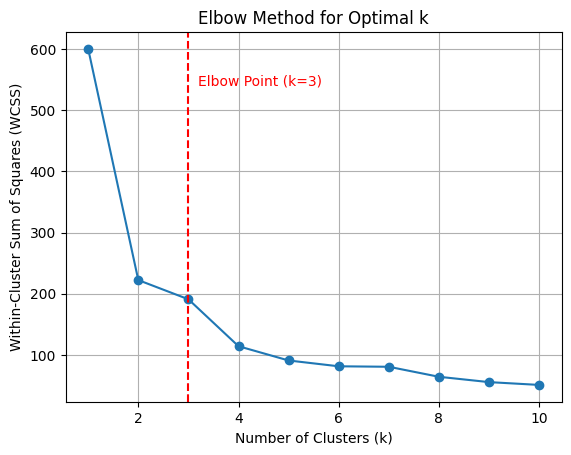

The optimal number of clusters (k) based on the elbow method is: 3


In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Calculate WCSS for a range of cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

# Identify the elbow point
# This is a visual inspection and might require manual adjustment
elbow_point = 3  # Example elbow point

# Add a vertical line to highlight the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--')
plt.text(elbow_point + 0.2, max(wcss) * 0.9, f'Elbow Point (k={elbow_point})', color='r')

# Show the plot
plt.show()

print(f"The optimal number of clusters (k) based on the elbow method is: {elbow_point}")

Predicted cluster: 1


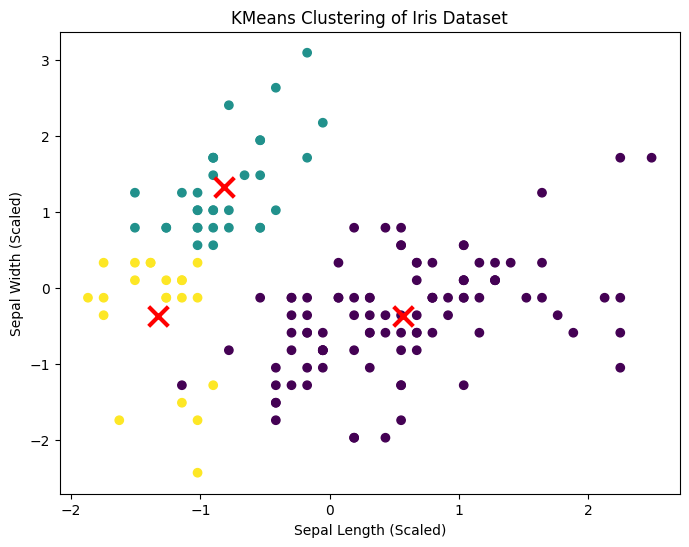

In [2]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Train the KMeans model
n_clusters = 3  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Save the trained model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Function to predict cluster for new data
def predict_cluster(new_data):
    # Preprocess the new data
    scaled_new_data = scaler.transform(new_data)
    # Predict the cluster
    cluster = kmeans.predict(scaled_new_data)
    return cluster

# Example usage for deployment
new_data_point = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example Iris data point
predicted_cluster = predict_cluster(new_data_point)
print(f"Predicted cluster: {predicted_cluster[0]}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (Scaled)')
plt.ylabel('Sepal Width (Scaled)')
plt.show()

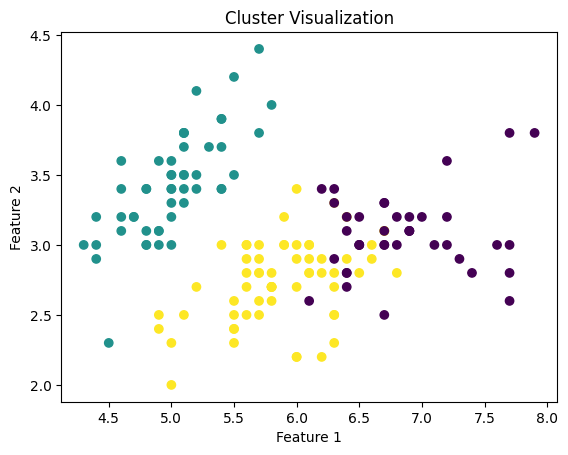

In [3]:
from sklearn.cluster import KMeans

# Assuming you have your data in 'data'
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(data)

# Get the cluster labels
labels = kmeans.labels_
import matplotlib.pyplot as plt

# Assuming you have your data in 'data' and cluster labels in 'labels'
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
!mkdir templates

In [5]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>KMeans Prediction - Iris Dataset</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            background: linear-gradient(to right, #6a11cb, #2575fc);
            color: white;
            font-family: 'Arial', sans-serif;
            text-align: center;
            padding: 20px;
        }
        .container {
            max-width: 600px;
            background: rgba(255, 255, 255, 0.2);
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            font-size: 2rem;
            margin-bottom: 20px;
        }
        input {
            width: 100%;
            padding: 10px;
            margin: 10px 0;
            border: none;
            border-radius: 5px;
        }
        button {
            background: #ff6f61;
            color: white;
            border: none;
            padding: 10px 20px;
            cursor: pointer;
            font-size: 1.2rem;
            border-radius: 5px;
        }
        button:hover {
            background: #ff3b2f;
        }
        .iris-info {
            margin-top: 20px;
            background: rgba(255, 255, 255, 0.3);
            padding: 15px;
            border-radius: 10px;
        }
        .iris-info img {
            width: 100%;
            border-radius: 10px;
        }
        #result {
            font-size: 1.5rem;
            font-weight: bold;
            margin-top: 20px;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>KMeans Prediction - Iris Dataset</h1>
        <p>Enter the features of an Iris flower, and we will predict its species using KMeans clustering.</p>

        <form id="predictionForm">
            <input type="number" id="sepalLength" name="sepalLength" step="any" placeholder="Sepal Length (cm)" required>
            <input type="number" id="sepalWidth" name="sepalWidth" step="any" placeholder="Sepal Width (cm)" required>
            <input type="number" id="petalLength" name="petalLength" step="any" placeholder="Petal Length (cm)" required>
            <input type="number" id="petalWidth" name="petalWidth" step="any" placeholder="Petal Width (cm)" required>
            <button type="submit">Predict</button>
        </form>

        <div id="result"></div>

        <div class="iris-info">
            <h3>About the Iris Dataset</h3>
            <p>The Iris dataset is one of the most famous datasets in machine learning. It contains 150 samples from three species:</p>
            <ul>
                <li><strong>Setosa</strong></li>
                <li><strong>Versicolor</strong></li>
                <li><strong>Virginica</strong></li>
            </ul>
            <img src="https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.png" alt="Iris Dataset Distribution" style="width:100%; border-radius:10px;">

        </div>
    </div>

    <script>
        const form = document.getElementById('predictionForm');
        form.addEventListener('submit', (event) => {
            event.preventDefault();

            const data = {
                data: [
                    parseFloat(document.getElementById('sepalLength').value),
                    parseFloat(document.getElementById('sepalWidth').value),
                    parseFloat(document.getElementById('petalLength').value),
                    parseFloat(document.getElementById('petalWidth').value)
                ]
            };

            fetch('/predict', {
                method: 'POST',
                headers: { 'Content-Type': 'application/json' },
                body: JSON.stringify(data)
            })
            .then(response => response.json())
            .then(data => {
                document.getElementById('result').innerText = 'Predicted Cluster: ' + data.cluster;
            })
            .catch(error => {
                console.error('Error:', error);
            });
        });
    </script>
</body>
</html>


Writing templates/index.html


In [7]:
!pip install pyngrok
from pyngrok import ngrok
!ngrok config add-authtoken 2uZb7H2TH3BxMVEB4xMDmzKQbEp_46NxeBJPHaX1x7i24GQ5u

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import pickle
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from flask import Flask, request, jsonify, render_template
from pyngrok import ngrok  # Using pyngrok for public URL
import os

# Initialize Flask app
app = Flask(__name__, template_folder='/content/templates')  # Ensure templates are in this folder

# Load the trained model
model_path = "/content/kmeans_model.pkl"  # Ensure the file is uploaded in Colab
if not os.path.exists(model_path):
    raise FileNotFoundError(f"❌ Model file '{model_path}' not found! Upload it to Colab.")

with open(model_path, 'rb') as f:
    kmeans = pickle.load(f)

# Initialize and fit StandardScaler on Iris dataset
scaler = StandardScaler()
iris = load_iris()
scaler.fit(iris.data)

@app.route('/')
def index():
    return render_template('index.html')  # Serve the HTML page

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    new_data_point = np.array(data['data']).reshape(1, -1)  # Reshape to 2D array
    scaled_new_data = scaler.transform(new_data_point)
    predicted_cluster = kmeans.predict(scaled_new_data)[0]

    # Map cluster number to cluster name
    cluster_names = {
        0: 'Setosa',
        1: 'Versicolor',
        2: 'Virginica'
    }
    predicted_cluster_name = cluster_names[predicted_cluster]

    return jsonify({'cluster': predicted_cluster_name})

if __name__ == '__main__':
    port = 5000
    public_url = ngrok.connect(port)
    print(f"🌍 Public URL: {public_url}")  # Print the public URL for access
    app.run(port=port)


🌍 Public URL: NgrokTunnel: "https://2bc4-34-173-241-235.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [20/Mar/2025 08:22:34] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [20/Mar/2025 08:22:35] "GET /favicon.ico HTTP/1.1" 404 -
